# Project Work - Sentimental Analysis on Amazon Review(Music Instruments)

dataset - http://jmcauley.ucsd.edu/data/amazon/

#### Musical Instruments  Prodcut Review is used. 

### Experiment Setup Overview
- Derived a small Dataset from 10 Reviews which has all kind of reviews(5, 4, 3, 2, 1 stars)
- Created a seperate training and test dataset. Test is not used in any training.
- Human Labelled from My friend <b><span style="color:purple">Hemanth and Bashyeam. - Thank you Guys</span></b>  .50 Documents are carefully labelled. 
- Everything is exported into csv. That is used in this experiment.


In [1]:
import numpy as np
import pandas as pd 
import json
import pymongo
from pymongo import MongoClient
from bson.objectid import ObjectId 
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import graphviz
import sklearn.metrics
from sklearn import metrics
import re
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import chi2
import pymongo
import random
from pymongo import MongoClient
pd.set_option('display.max_columns', None)

%matplotlib inline

## Section 1: Dataset Description

Amazon review dataset on Musical Instuments

In [2]:
train = pd.read_csv("../data/dataset.csv",header=0)
test = pd.read_csv("../data/test.csv",header=0)
train = train.fillna('')
pd.DataFrame(train.columns, columns=['Train-Columns'])

,Train-Columns
0,_id
1,asin
2,cleaned_review_text
3,helpful.0
4,helpful.1
5,human_labelled
6,keywords
7,labelled
8,load_to_db
9,neg_doc


In [3]:
pd.DataFrame(test.columns, columns=['Test-Columns'])

,Test-Columns
0,asin
1,overall
2,reviewText


In [4]:
test.head()

,asin,overall,reviewText
0,B0002E37MM,1,"I bought this hoping to use as intended, angle..."
1,B0002E2Z8Y,1,"I know many people love the design, but I find..."
2,B0002E2KPC,1,This is an update to my original review becaus...
3,B0002E1O2M,1,I bought a set as they were recommended to get...
4,B0002DV7U2,1,"...for something, but not a guitar. Wasn't su..."


In [5]:
train.head(3)

,_id,asin,cleaned_review_text,helpful.0,helpful.1,human_labelled,keywords,labelled,load_to_db,neg_doc,overall,rationales,rationals.0,rationals.1,rationals.2,rationals.3,rationals.4,rationals.5,rationals.6,rationals.7,reviewText
0,5a1e177778b95010ea1895d2,1384719342,Not much to write about here but it does exact...,0,0,False,,True,True,,5.0,,exactly,crisp,lowest,,,,,,"Not much to write about here, but it does exac..."
1,5a1e177778b95010ea1895d3,1384719342,The product does exactly as it should and is q...,13,14,False,,True,True,,5.0,,does,affordable,,,,,,,The product does exactly as it should and is q...
2,5a1e177778b95010ea1895d4,1384719342,The primary job of this device is to block the...,1,1,False,,True,True,,5.0,,no,noticeable,reduction,secure,,,,,The primary job of this device is to block the...


### Section 2: Model Fit Basic

### Logistic Regression and BNB is used
For testing what is accuracy

In [6]:
X_train = train['cleaned_review_text']
X_test = test['reviewText']
train['Y'] = train['overall'] == 5.0
test['Y'] = test['overall'] == 5.0
train['Y'] = train['overall'] == 4.0
test['Y'] = test['overall'] == 4.0

In [7]:
y_train = []
y_test = []
for each in range(train.shape[0]):
    if train.loc[each, 'Y']:
        y_train.append(1)
        y_test.append(1)
    else:
        y_train.append(0)
        y_test.append(0)

In [8]:
f"Positve Docs {np.sum(y_train)}, Negative Docs {train.shape[0] - np.sum(y_train)}"

'Positve Docs 343, Negative Docs 183'

In [9]:
vectorizer = CountVectorizer(min_df=5, max_df=1.0, binary=True)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [10]:
features = pd.DataFrame(vectorizer.get_feature_names())

### BernoulliNB

In [11]:
clf = BernoulliNB()
clf.fit(X_train_vec, y_train)

y_predict = clf.predict(X_train_vec)
y_proba = clf.predict_proba(X_test_vec)

accuracy_score(y_test, y_predict)

0.81939163498098855

#### AUC Score

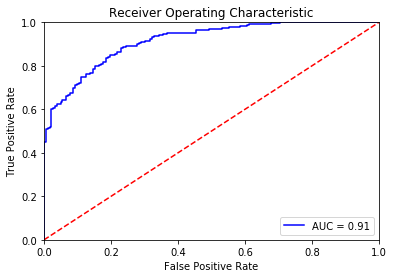

In [12]:
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_train_vec)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Logistic Regression

#### C = 0.001  

In [13]:
clf = LogisticRegression(penalty='l2', C = 0.001)
clf.fit(X_train_vec, y_train)
y_predict = clf.predict(X_train_vec)
y_proba = clf.predict_proba(X_test_vec)

accuracy_score(y_test, y_predict)

0.65209125475285168

### AUC Score

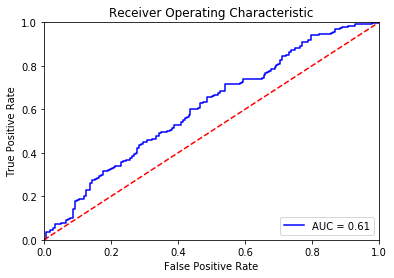

In [14]:
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_train_vec)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### C = 1

In [15]:
clf = LogisticRegression(penalty='l2', C = 1)
clf.fit(X_train_vec, y_train)
y_predict = clf.predict(X_train_vec)
y_proba = clf.predict_proba(X_test_vec)

accuracy_score(y_test, y_predict)

0.99619771863117867

### AUC Score

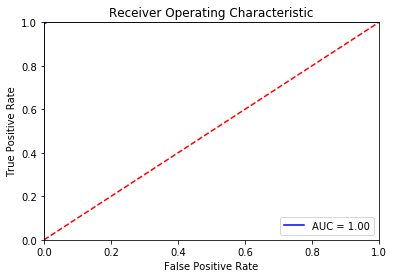

In [16]:
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_train_vec)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
'''
step 1: It converts the co-ef to absolute value
step 2: Appends to info list(feature_name, weight)
'''
def top_weighted_features(coef,label, features):
    coef = np.ravel(np.abs(coef))
    info = []
    index = np.ravel(coef).argsort()[::-1][:11]
    for t in range(10):
        info.append([features[index[t]][0],coef[index[t]]])
    return pd.DataFrame(info)

In [18]:
features = pd.DataFrame.transpose(features)

### Top 10 Feature absolute weights 

#### Transparency 

In [19]:
top_weighted_features(clf.coef_[0],'LR', features)

,0,1
0,midi,1.189383
1,fine,1.072322
2,noticed,1.045061
3,came,0.970896
4,thick,0.925214
5,just,0.923685
6,almost,0.870380
7,equipment,0.860073
8,noisy,0.859717
9,by,0.837260


In [20]:
features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

### Uncertain in Test dataset

In [21]:
t = clf.predict_proba(X_test_vec)

In [22]:
count = 0
for i in range(X_test_vec.shape[0]):
    if t[i][0] < 0.6 and t[i][0] > 0.3 :
            #print(t[i][0])
            count += 1
print("Uncertain Objects count = " ,count )

Uncertain Objects count =  33


## Section 3: Active Learning 

#### Artificial Labelling - Chi Square to get all postive and negative words from Train dataset

In [23]:
pos_chi_scores = np.argsort(chi2(X_train_vec,y_train)[1])[::-1]
neg_chi_scores = np.argsort(chi2(X_train_vec,y_train)[0])[::-1]
pos_words = []
for i in range(features.shape[1]):
    pos_words.append(features[pos_chi_scores[i]])

neg_words = []
for i in range(features.shape[1]):
    neg_words.append(features[neg_chi_scores[i]])

In [24]:
pd.DataFrame(pos_words[:10])

,0
32,amazon
683,pop
365,good
694,pretty
748,reviews
278,especially
690,practice
206,cutter
1006,with
934,try


In [25]:
pd.DataFrame(neg_words[:10])

,0
961,useless
545,midi
190,control
540,mic
558,monster
543,mics
588,noisy
984,week
618,opinion
724,read


### Active Learning using  Tandem Learning 
In which we mark top words from chi-square to rationale

In [26]:
r = 1
o = 0.01

In [27]:
X_train_rationale_vec = X_train_vec.copy() 

In [28]:
X_train_rationale_vec = X_train_rationale_vec.todense()

In [29]:
X_train_rationale_vec = X_train_rationale_vec * o

In [30]:
for doc_i in range(X_train_rationale_vec.shape[0]):
    if y_train[doc_i] == 1: # pos document
        for j in range(50):
            if X_train_rationale_vec[doc_i,pos_words[j].name] == 0.01:
                X_train_rationale_vec[doc_i,pos_words[j].name] = 1
                #print(pos_words[j][0])
    if y_train[doc_i] == 0: # pos document
        for k in range(50):
            if X_train_rationale_vec[doc_i,pos_words[k].name] == 0.01:
                X_train_rationale_vec[doc_i,neg_words[k].name] = 1
        

### Example for document 1

In [31]:
train.loc[0,'cleaned_review_text']

'Not much to write about here but it does exactly what its supposed to filters out the pop sounds now my recordings are much more crisp it is one of the lowest prices pop filters on amazon so might as well buy it they honestly work the same despite their pricing'

#### Test 

#### 5 Words rationale  document 1

In [32]:
np.sum(X_train_rationale_vec[0] == 1)

5

#### 37 words as non-rationale  document 2

In [33]:
np.sum(X_train_rationale_vec[0] == 0.01)

37

In [34]:
clf = LogisticRegression(penalty='l2', C = 0.001)
clf.fit(X_train_rationale_vec[:50], y_train[:50])
y_predict = clf.predict(X_train_rationale_vec[:50])
y_proba = clf.predict_proba(X_test_vec[:50])

accuracy_score(y_test[:50], y_predict)

0.95999999999999996

In [35]:
stats  = []
f_we_wr = []

In [36]:
def AL_tandem_learning(size):
    clf = LogisticRegression(penalty='l2', C = 0.001)
    clf.fit(X_train_rationale_vec[:size], y_train[:size])
    y_predict = clf.predict(X_test_vec[:size])
    y_proba = clf.predict_proba(X_test_vec[:size])

    a = accuracy_score(y_test[:size], y_predict)
    
    f_we_wr.append(top_weighted_features(clf.coef_[0], "LR", features))
    preds = y_proba[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test[:size], preds)
    roc_auc = metrics.auc(fpr, tpr)
    stats.append([a,roc_auc])
    print(f"{size}, accuracy = {a}, auc = {roc_auc}")

In [37]:
x_ax = []
for i in range(25):
    x_ax.append(x_ax)
    AL_tandem_learning(40 + i * 5)

40, accuracy = 0.8, auc = 0.65625
45, accuracy = 0.7111111111111111, auc = 0.5277777777777778
50, accuracy = 0.62, auc = 0.5367647058823529
55, accuracy = 0.45454545454545453, auc = 0.45285714285714285
60, accuracy = 0.48333333333333334, auc = 0.4557416267942584
65, accuracy = 0.4, auc = 0.44999999999999996
70, accuracy = 0.4, auc = 0.45500420521446594
75, accuracy = 0.41333333333333333, auc = 0.4662840746054519
80, accuracy = 0.425, auc = 0.4717460317460317
85, accuracy = 0.4235294117647059, auc = 0.4905239687848383
90, accuracy = 0.45555555555555555, auc = 0.5007422068283027
95, accuracy = 0.47368421052631576, auc = 0.5146406388642413
100, accuracy = 0.49, auc = 0.5038015206082433
105, accuracy = 0.4857142857142857, auc = 0.5108932461873639
110, accuracy = 0.4818181818181818, auc = 0.5112433862433863
115, accuracy = 0.5217391304347826, auc = 0.5191256830601093
120, accuracy = 0.5333333333333333, auc = 0.514965034965035
125, accuracy = 0.552, auc = 0.507012987012987
130, accuracy = 0.

#### Transparency With Rational (Tandem Learning)

In [38]:
f_we_wr[-1]

,0,1
0,and,0.035263
1,by,0.025491
2,with,0.025165
3,opinion,0.018606
4,its,0.015229
5,good,0.014789
6,control,0.010322
7,has,0.008529
8,there,0.008044
9,sm,0.007816


In [39]:
t_with_rational = pd.DataFrame(stats)

In [40]:
stats=[]
f_we_AL_no_rational = []
def AL_no_rational(size):
    clf = LogisticRegression(penalty='l2', C = 0.001)
    clf.fit(X_train_vec[:size], y_train[:size])
    
    f_we_AL_no_rational.append(top_weighted_features(clf.coef_[0],'LR', features))
    
    y_predict = clf.predict(X_test_vec[:size])
    y_proba = clf.predict_proba(X_test_vec[:size])
    
    a = accuracy_score(y_test[:size], y_predict)
    preds = y_proba[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test[:size], preds)
    roc_auc = metrics.auc(fpr, tpr)
    stats.append([a,roc_auc])
    
    print(f"{size}, accuracy = {a}, auc = {roc_auc}")
    

In [41]:
x_ax = []
for i in range(25):
    x_ax.append(40 + i * 5)
    AL_no_rational(40 + i * 5)

40, accuracy = 0.8, auc = 0.671875
45, accuracy = 0.7333333333333333, auc = 0.6742424242424242
50, accuracy = 0.68, auc = 0.5808823529411764
55, accuracy = 0.6363636363636364, auc = 0.43
60, accuracy = 0.6333333333333333, auc = 0.49880382775119614
65, accuracy = 0.6153846153846154, auc = 0.46199999999999997
70, accuracy = 0.5857142857142857, auc = 0.3994953742640875
75, accuracy = 0.41333333333333333, auc = 0.3428981348637016
80, accuracy = 0.5625, auc = 0.3904761904761904
85, accuracy = 0.4117647058823529, auc = 0.35562987736900775
90, accuracy = 0.4777777777777778, auc = 0.396833250865908
95, accuracy = 0.45263157894736844, auc = 0.3935226264418811
100, accuracy = 0.53, auc = 0.4109643857543017
105, accuracy = 0.5047619047619047, auc = 0.4037763253449528
110, accuracy = 0.4818181818181818, auc = 0.4365079365079365
115, accuracy = 0.5217391304347826, auc = 0.42501517911353975
120, accuracy = 0.5416666666666666, auc = 0.42097902097902096
125, accuracy = 0.56, auc = 0.44415584415584414


In [42]:
t_no_rational = pd.DataFrame(stats)

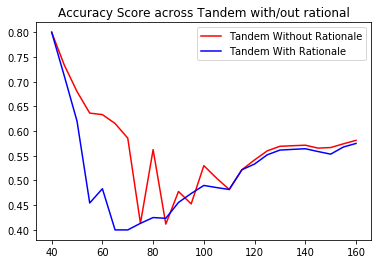

In [43]:
plt.title("Accuracy Score across Tandem with/out rational")
plt.plot(x_ax, t_no_rational[0],  'r-',label="Tandem Without Rationale")
plt.plot(x_ax, t_with_rational[0],  'b-',label="Tandem With Rationale")
plt.legend()

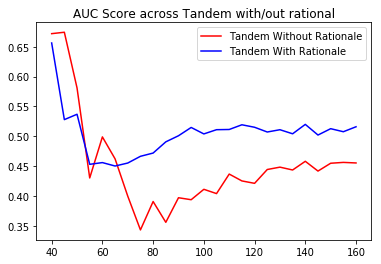

In [44]:
plt.title("AUC Score across Tandem with/out rational")
plt.plot(x_ax, t_no_rational[1],  'r-',label="Tandem Without Rationale")
plt.plot(x_ax, t_with_rational[1],  'b-',label="Tandem With Rationale")
plt.legend()

### Transparency

In [45]:
T = pd.concat([f_we_wr[-1],f_we_AL_no_rational[-1]], axis = 1, )

In [46]:
T.columns =['Features(rational)', 'Weights', 'Features(no rational)', 'Weights']

In [47]:
T

,Features(rational),Weights,Features(no rational),Weights
0,and,0.035263,on,0.011774
1,by,0.025491,to,0.008361
2,with,0.025165,get,0.008341
3,opinion,0.018606,have,0.008263
4,its,0.015229,can,0.008082
5,good,0.014789,in,0.007987
6,control,0.010322,for,0.007722
7,has,0.008529,and,0.007383
8,there,0.008044,other,0.006749
9,sm,0.007816,little,0.006409


## Section 3: Active Learning with Human annotated Rationale for 50 document

In [48]:
train.columns

Index(['_id', 'asin', 'cleaned_review_text', 'helpful.0', 'helpful.1',
       'human_labelled', 'keywords', 'labelled', 'load_to_db', 'neg_doc',
       'overall', 'rationales', 'rationals.0', 'rationals.1', 'rationals.2',
       'rationals.3', 'rationals.4', 'rationals.5', 'rationals.6',
       'rationals.7', 'reviewText', 'Y'],
      dtype='object')

### Human labeled docs preview

In [49]:
train.head(1)

,_id,asin,cleaned_review_text,helpful.0,helpful.1,human_labelled,keywords,labelled,load_to_db,neg_doc,overall,rationales,rationals.0,rationals.1,rationals.2,rationals.3,rationals.4,rationals.5,rationals.6,rationals.7,reviewText,Y
0,5a1e177778b95010ea1895d2,1384719342,Not much to write about here but it does exact...,0,0,False,,True,True,,5.0,,exactly,crisp,lowest,,,,,,"Not much to write about here, but it does exac...",False


In [50]:
L = []
y_rationa_train = []
for row in range(train.shape[0]):
    if train.at[row,'labelled'] == True:
        # uncomment to see in detail
        #print(f"Review Text: {train.at[row,'reviewText']}\n\n")
        #print("****************Rationales of Text*****************")
        rt = ''
        for i in range(7):
            rt += train.at[row,f'rationals.{i}'] +','
            #print(train.at[row,f'rationals.{i}'])
        L.append([train.at[row,'reviewText'], rt, train.at[row,'Y']])
        if train.at[row,'Y']:
            y_rationa_train.append(1)
        else:
            y_rationa_train.append(0)
        #print("***************************************************")
    else:
        L.append([train.at[row,'reviewText'], '', train.at[row,'Y']])
        if train.at[row,'Y']:
            y_rationa_train.append(1)
        else:
            y_rationa_train.append(0)

In [51]:
L_docs = pd.DataFrame(L, columns=['ReviewText', 'Rationales', 'Y'])

#### Labelled Docs

In [52]:
L_docs.shape

(526, 3)

In [53]:
L_docs.head()

,ReviewText,Rationales,Y
0,"Not much to write about here, but it does exac...","exactly,crisp,lowest,,,,,",False
1,The product does exactly as it should and is q...,"does,affordable,,,,,,",False
2,The primary job of this device is to block the...,"no,noticeable,reduction,secure,,,,",False
3,Nice windscreen protects my MXL mic and preven...,"prevents,pops,,,,,,",False
4,This pop filter is great. It looks and perform...,"great,looks,performs,eliminate,pops,,,",False


In [54]:
vectorizer = CountVectorizer(binary=True)
X_rational_train_vec = vectorizer.fit_transform(L_docs['ReviewText'])
X_rational_test_vec = vectorizer.transform(X_test)

In [55]:
features = pd.DataFrame(vectorizer.get_feature_names())

In [56]:
features = pd.DataFrame.transpose(features)

In [57]:
X_rational_test_vec.shape

(163, 4806)

In [58]:
X_rational_train_vec.shape

(526, 4806)

In [59]:
stats = []
f_alwor = []
def AL_without(size):
    
    clf = LogisticRegression(penalty='l2', C = 0.001)
    clf.fit(X_rational_train_vec[:size], y_rationa_train[:size])
    
    y_predict = clf.predict(X_rational_test_vec[:size])
    y_proba = clf.predict_proba(X_rational_test_vec[:size])
    
    f_alwor.append(top_weighted_features(clf.coef_[0],'LR', features))
    
    
    a = accuracy_score(y_test[:size], y_predict)
    preds = y_proba[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test[:size], preds)
    roc_auc = metrics.auc(fpr, tpr)
    stats.append([a,roc_auc])
    print(f"{size}, accuracy = {a}, auc = {roc_auc}")

In [60]:
for i in range(25):
    AL_without(40 + i * 5)

40, accuracy = 0.8, auc = 0.6640625
45, accuracy = 0.7333333333333333, auc = 0.6767676767676768
50, accuracy = 0.68, auc = 0.6047794117647058
55, accuracy = 0.6363636363636364, auc = 0.4742857142857143
60, accuracy = 0.6333333333333333, auc = 0.5215311004784688
65, accuracy = 0.6153846153846154, auc = 0.495
70, accuracy = 0.5857142857142857, auc = 0.43145500420521443
75, accuracy = 0.41333333333333333, auc = 0.3615494978479196
80, accuracy = 0.5625, auc = 0.42666666666666664
85, accuracy = 0.4470588235294118, auc = 0.3874024526198439
90, accuracy = 0.4888888888888889, auc = 0.4156358238495794
95, accuracy = 0.45263157894736844, auc = 0.40372670807453415
100, accuracy = 0.53, auc = 0.41736694677871145
105, accuracy = 0.5047619047619047, auc = 0.42156862745098045
110, accuracy = 0.5, auc = 0.4642857142857143
115, accuracy = 0.5304347826086957, auc = 0.4353369763205829
120, accuracy = 0.55, auc = 0.4335664335664336
125, accuracy = 0.56, auc = 0.4612987012987013
130, accuracy = 0.569230769

In [61]:
alwtout = pd.DataFrame(stats)

In [62]:
L_docs.at[0,'ReviewText']

"Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,"

In [63]:
L_docs.at[0,'Rationales']

'exactly,crisp,lowest,,,,,'

### Rationale Addition 

In [64]:
r = 1
o = 0.01

In [65]:
X_rational_train_vec = X_rational_train_vec.todense()
X_rational_train_vec = X_rational_train_vec * o
X_rational_train_vec.shape

(526, 4806)

### Local Marking of rationales

In [66]:
F = {}
for i in range(features.shape[1]):
        F[features[i][0]] = features[i].name

In [67]:
for row in range(X_rational_train_vec.shape[0]):
    words = L_docs.at[row,'Rationales'].split(',')
    for w in words:
        if len(w) > 0:
            try:
                index = F[w]
                X_rational_train_vec[row, index] = 1
            except KeyError:
                print(f"'{w}' Not Found in Vectorized Colums, \n\t\t\t\t\tNot Handled these for now-TODO")

'Love' Not Found in Vectorized Colums, 
					Not Handled these for now-TODO
'Monster' Not Found in Vectorized Colums, 
					Not Handled these for now-TODO
'Placid' Not Found in Vectorized Colums, 
					Not Handled these for now-TODO
'Highly' Not Found in Vectorized Colums, 
					Not Handled these for now-TODO
'Sturdy' Not Found in Vectorized Colums, 
					Not Handled these for now-TODO
'Satisfied' Not Found in Vectorized Colums, 
					Not Handled these for now-TODO
'Replace' Not Found in Vectorized Colums, 
					Not Handled these for now-TODO
'arent' Not Found in Vectorized Colums, 
					Not Handled these for now-TODO
'NOT' Not Found in Vectorized Colums, 
					Not Handled these for now-TODO
'WILL' Not Found in Vectorized Colums, 
					Not Handled these for now-TODO
'NOT' Not Found in Vectorized Colums, 
					Not Handled these for now-TODO
'EXCHANGE' Not Found in Vectorized Colums, 
					Not Handled these for now-TODO
'Distortion' Not Found in Vectorized Colums, 
					Not Handled these

#### Test on Marking 

In [68]:
L_docs.head(1)

,ReviewText,Rationales,Y
0,"Not much to write about here, but it does exac...","exactly,crisp,lowest,,,,,",False


##### Exactly 3 words are marked in sparse matrix

In [69]:
np.sum(X_rational_train_vec[0, :] == 1)

3

<h2 style="color:green">Section 5: Active Learning with Rationale</h2>

In [70]:
stats = []
f_we = []
def AL_withrationale(size):
    clf = LogisticRegression(penalty='l2', C = 0.001)
    
    clf.fit(X_rational_train_vec[:size], y_rationa_train[:size])
    
    y_predict = clf.predict(X_rational_test_vec[:size])
    
    y_proba = clf.predict_proba(X_rational_test_vec[:size])
    f_we.append(top_weighted_features(clf.coef_[0],'LR', features))
    a = accuracy_score(y_test[:size], y_predict)
    preds = y_proba[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test[:size], preds)
    roc_auc = metrics.auc(fpr, tpr)
    stats.append([a,roc_auc])
    print(f"{size}, accuracy = {a}, auc = {roc_auc}")

In [71]:
for i in range(25):
    AL_withrationale(40 + i * 5)

40, accuracy = 0.8, auc = 0.49609375
45, accuracy = 0.7333333333333333, auc = 0.4924242424242425
50, accuracy = 0.68, auc = 0.46139705882352944
55, accuracy = 0.6363636363636364, auc = 0.4928571428571429
60, accuracy = 0.6333333333333333, auc = 0.49282296650717705
65, accuracy = 0.6153846153846154, auc = 0.521
70, accuracy = 0.5857142857142857, auc = 0.5130361648444071
75, accuracy = 0.5466666666666666, auc = 0.47776183644189385
80, accuracy = 0.5625, auc = 0.49269841269841275
85, accuracy = 0.5411764705882353, auc = 0.49275362318840576
90, accuracy = 0.5222222222222223, auc = 0.48144482929242954
95, accuracy = 0.5157894736842106, auc = 0.4915705412599823
100, accuracy = 0.47, auc = 0.4989995998399359
105, accuracy = 0.47619047619047616, auc = 0.4970951343500364
110, accuracy = 0.4727272727272727, auc = 0.49702380952380953
115, accuracy = 0.4956521739130435, auc = 0.4820886460230723
120, accuracy = 0.45, auc = 0.467972027972028
125, accuracy = 0.512, auc = 0.4636363636363636
130, accur

In [72]:
alwr = pd.DataFrame(stats)

In [73]:
x_axis=[]
for i in range(25):
    x_axis.append(40 + i * 5)

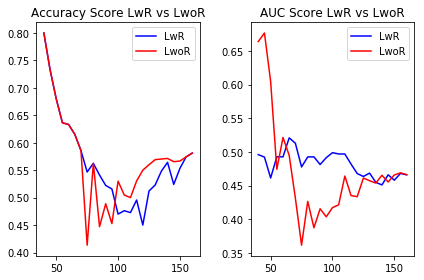

In [74]:
plt.subplot(121)
plt.title("Accuracy Score LwR vs LwoR")
plt.plot(x_axis,alwr[0],'b-',label="LwR")
plt.plot(x_axis,alwtout[0], 'r-',label="LwoR")
plt.legend()
plt.subplot(122)
plt.title("AUC Score LwR vs LwoR")
plt.plot(x_axis,alwr[1],'b-',label="LwR")
plt.plot(x_axis,alwtout[1],'r-',label="LwoR")
plt.tight_layout()
plt.legend()

# Conclusion: Transparency Overview

In [75]:
FW = pd.concat([T, f_we[-1], f_alwor[-1]], axis=1)
FW.columns = ['Tandem (rational, artificial labeler)', 'Weights', 'Tandem(no rational)', 'Weights', 'LwR(Human Labelled)', 'Weights', 'LwoR', 'Weights' ] 

In [76]:
FW

,"Tandem (rational, artificial labeler)",Weights,Tandem(no rational),Weights,LwR(Human Labelled),Weights,LwoR,Weights
0,and,0.035263,on,0.011774,great,0.002962,on,0.011758
1,by,0.025491,to,0.008361,good,0.002933,to,0.008355
2,with,0.025165,get,0.008341,quality,0.001477,get,0.008337
3,opinion,0.018606,have,0.008263,well,0.001457,have,0.008261
4,its,0.015229,can,0.008082,cables,0.001030,in,0.007907
5,good,0.014789,in,0.007987,higher,0.001015,for,0.007708
6,control,0.010322,for,0.007722,horrible,0.001010,and,0.007377
7,has,0.008529,and,0.007383,doesnt,0.001005,can,0.006902
8,there,0.008044,other,0.006749,looks,0.001004,other,0.006714
9,sm,0.007816,little,0.006409,recommended,0.000995,little,0.006414


### Future works
- Logistic Regression is choosed just for simplicity. But in future try other models.
- Scale the dataset. Here I Used a small version of dataset
- Collect Rationales more using Uncertainity Sampling
- Extend the Web-APP UI to hold deletion.
- Try Learning with Explanation